In [6]:
#program1
import csv 
with open('book1.csv', 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)
h = [['0', '0', '0', '0', '0', '0']]
print ("\n The most specific hypothesis : ['0','0','0','0','0',' 0']\n")
for i in your_list:
    if i[-1] == "Yes":
        j = 0
        for x in i:  
            if x != "Yes":
                if x!=h[0][j] and h[0][j] == '0':
                    h[0][j] = x
                elif x!=h[0][j] and h[0][j]!='0':
                    h[0][j]='?'
                else:
                    pass
            j=j+1
print("\n The Maximally Specific Hypothesis for a given Training Examples :\n")
print(h)



 The most specific hypothesis : ['0','0','0','0','0',' 0']


 The Maximally Specific Hypothesis for a given Training Examples :

[['Sunny', 'Warm', '?', 'Strong', '?', '?']]


In [9]:
#program2
import numpy as np
import pandas as pd
data = pd.DataFrame(data=pd.read_csv('book1.csv'))
concepts = np.array(data.iloc[:,0:-1])
target = np.array(data.iloc[:,-1])
def learn(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    for i, h in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        if target[i] == "No":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
    indices = [i for i,val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("Final S:", s_final, sep="\n")
print("Final G:", g_final, sep="\n")


Final S:
['Sunny' 'Warm' '?' 'Strong' '?' '?']
Final G:
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]


In [14]:
#program4
import numpy as np # numpy is commonly used to process number array
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float) # Features ( Hrs Slept, Hrs Studied)
y = np.array(([92], [86], [89]), dtype=float) # Labels(Marks obtained)
X = X/np.amax(X,axis=0) # Normalize
y = y/100
def sigmoid(x):
     return 1/(1 + np.exp(-x))
def sigmoid_grad(x):
     return x * (1 - x)
# Variable initialization
epoch=1000 			#Setting training iterations
eta =0.2 			#Setting learning rate (eta)
input_neurons = 2 		#number of features in data set
hidden_neurons = 3 		#number of hidden layers neurons
output_neurons = 1 		#number of neurons at output layerlr=0.1 #Setting learning rate

inputlayer_neurons = 2 	#number of features in data set
hiddenlayer_neurons = 3 	#number of hidden layers neurons
output_neurons = 1 		#number of neurons at output layer
# Weight and bias - Random initialization
wh=np.random.uniform(size=(input_neurons,hidden_neurons))	 	# 2x3
bh=np.random.uniform(size=(1,hidden_neurons)) 				# 1x3
wout=np.random.uniform(size=(hidden_neurons,output_neurons)) 	# 1x1
bout=np.random.uniform(size=(1,output_neurons))
for i in range(epoch):
#Forward Propogation
      h_ip=np.dot(X,wh) + bh		 # Dot product + bias
      h_act = sigmoid(h_ip) 		# Activation function
      o_ip=np.dot(h_act,wout) + bout
      output = sigmoid(o_ip)
#Backpropagation
# Error at Output layer
Eo = y-output 				# Error at o/p
outgrad = sigmoid_grad(output)
d_output = Eo* outgrad 		# Errj=Oj(1-Oj)(Tj-Oj)
# Error at Hidden later
Eh = d_output.dot(wout.T) 		# .T means transpose
hiddengrad = sigmoid_grad(h_act) 	# How much hidden layer wts contributed to error
d_hidden = Eh * hiddengrad
wout += h_act.T.dot(d_output) *eta 	# Dotproduct of nextlayererror and currentlayerop
wh += X.T.dot(d_hidden) *eta
print("Normalized Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)


Normalized Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.72750543]
 [0.71478722]
 [0.72798509]]


In [2]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
data = pd.read_csv('iris.csv')

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

classifier = GaussianNB()
classifier.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(classifier.predict(X_test),y_test))

Accuracy is: 1.0


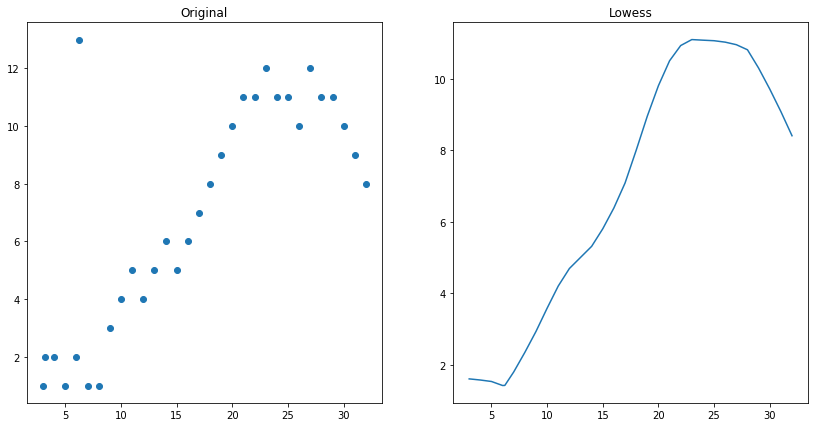

In [4]:
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
x=list(range(3,33))+[3.2,6.2]
y=[1,2,1,2,1,1,3,4,5,4,5,6,5,6,7,8,9,10,11,11,12,11,11,10,12,11,11,10,9,8,2,13]
lowess=sm.nonparametric.lowess(y,x,frac=0.3) 
lowess_x=list(zip(*lowess))[0] 
lowess_y=list(zip(*lowess))[1]
plt.figure(figsize=(14,7)) 
plt.subplot(1,2,1) 
plt.title('Original') 
plt.plot(x,y,'o')
plt.subplot(1,2,2) 
plt.title('Lowess')
plt.plot(lowess_x,lowess_y,'-')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import datasets
iris=datasets.load_iris()
iris_data=iris.data
iris_labels=iris.target
x_train,x_test,y_train,y_test=train_test_split(iris_data,iris_labels,test_size=0.30)
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Confusion matrix is as follows")
print(confusion_matrix(y_test,y_pred))
print("Accuracy matrix")
print(classification_report(y_test,y_pred))


Confusion matrix is as follows
[[16  0  0]
 [ 0 16  0]
 [ 0  1 12]]
Accuracy matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        16
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



Text(0.5, 1.0, 'GMM Classification')

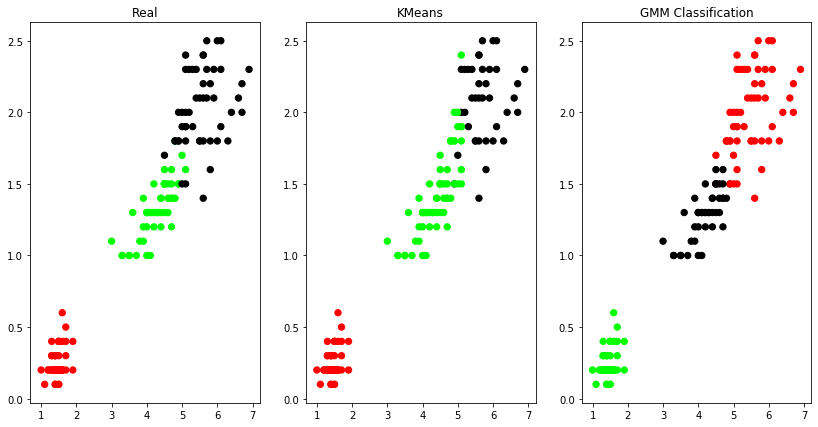

In [6]:
from sklearn.cluster import KMeans 
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture 
from sklearn.datasets import load_iris
import sklearn.metrics as sm 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset=load_iris() 
X=pd.DataFrame(dataset.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'] 
y=pd.DataFrame(dataset.target)
y.columns=['Targets'] 
plt.figure(figsize=(14,7)) 
colormap=np.array(['red','lime','black'])
#REAL PLOT
plt.subplot(1,3,1) 
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40) 
plt.title('Real')
#KMeans -PLOT 
plt.subplot(1,3,2) 
model=KMeans(n_clusters=3) 
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64) 
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40) 
plt.title('KMeans')
#GMM PLOT
scaler=preprocessing.StandardScaler() 
scaler.fit(X)
xsa=scaler.transform(X) 
xs=pd.DataFrame(xsa,columns=X.columns) 
gmm=GaussianMixture(n_components=3) 
gmm.fit(xs) 
y_cluster_gmm=gmm.predict(xs) 
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification') 


In [11]:
import numpy as np
import pandas as pd
import csv
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

 #Read the attributes
lines = list(csv.reader(open('data7_names.csv', 'r')));
attributes = lines[0]
 #Read Cleveland Heart dicease data
heartDisease = pd.read_csv('data7_heart.csv', names = attributes)
heartDisease = heartDisease.replace('?', np.nan)
# Display the data
 #print('Few examples from the dataset are given below')
 #print(heartDisease.head())
 #print('\nAttributes and datatypes')
 #print(heartDisease.dtypes)

 # Model Baysian Network
model = BayesianModel([('age', 'trestbps'), ('age', 'fbs'), ('sex', 'trestbps'), ('sex', 'trestbps'),
 ('exang', 'trestbps'),('trestbps','heartdisease'),('fbs','heartdisease'),
 ('heartdisease','restecg'),('heartdisease','thalach'),('heartdisease','chol')])

 # Learning CPDs using Maximum Likelihood Estimators
print('\nLearning CPDs using Maximum Likelihood Estimators...');
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)

 # Inferencing with Bayesian Network
print('\nInferencing with Bayesian Network:')
HeartDisease_infer = VariableElimination(model)

 # Computing the probability of bronc given smoke.
print('\n1.Probability of HeartDisease given Age=28')
q = HeartDisease_infer.query(variables=['heartdisease'], evidence={'age': 28})
print(q['heartdisease'])

print('\n2. Probability of HeartDisease given chol (Cholestoral) =100')
q = HeartDisease_infer.query(variables=['heartdisease'], evidence={'chol': 100})
print(q['heartdisease'])


ModuleNotFoundError: No module named 'pgmpy'

In [9]:
conda install pgmpy

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - pgmpy

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


